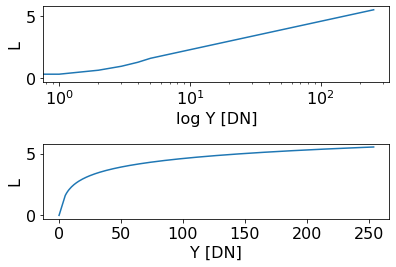

In [47]:
import numpy as np
from matplotlib import pyplot as plt
from src.emulator import lin_log

y=np.array(range(255), float)
l=lin_log(y,threshold=5)

fnt=16
plt.subplot(211)
plt.rcParams.update({'font.size': fnt})
plt.plot(y,l)
plt.xlabel('log Y [DN]')
plt.ylabel('L')
plt.tight_layout()
plt.xscale('log')

plt.subplot(212)
plt.rcParams.update({'font.size': fnt})
plt.plot(y,l)
plt.xlabel('Y [DN]')
plt.ylabel('L')
plt.tight_layout()
plt.xscale('linear')

plt.savefig('../output/linlog.pdf')
plt.savefig('../media/linlog.png')




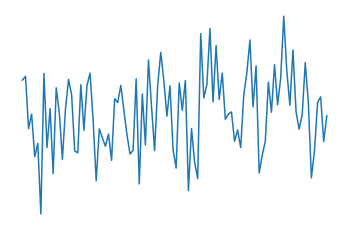

In [6]:
import numpy as np
from matplotlib import pyplot as plt

t=np.array(range(100),float)
n=np.random.randn(len(t))
fig=plt.figure(3)
plt.plot(t,n)
plt.axis('off')
plt.savefig('../output/noise.pdf')

In [25]:
# compute the expected number of temporal noise events per sample for a
# given sigma of gaussian noise sig and threshold th
import numpy as np
from math import erf, sqrt
# https://docs.python.org/3.2/library/math.html
def phi(x):
    'Cumulative distribution function for the standard normal distribution'
    return (1.0 + erf(x / sqrt(2.0))) / 2.0

RnHzDesired=0.1 # desired rate of noise events per second
fsHz=100 # sample rate Hz
theta=.15 # event threshold in log_e units, but it doesn't matter what it is
# dumb search for best sigma
for sig in np.linspace(0,theta,1000):
    n=0
    for k in range(1,100):
        th0=k*theta
        th1=(k+1)*theta
        n+=k*(phi(th1/sig)-phi(th0/sig)) # weight expected # events times probability       
        Rn=fsHz*n
    if Rn>RnHzDesired:
        print('sig={:6.2f}\tn={:8.3g}ev/samp\tRn={:8.3g}ev/s'.format(sig,n,Rn))
        print('desired rate: {}'.format(RnHzDesired))
        break
 


sig=  0.05	n= 0.00102ev/samp	Rn=   0.102ev/s
desired rate: 0.1


C:\Users\Tobi\Anaconda3\envs\pt-v2e\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
